# Import libaries 

In [16]:
# Data wrangling 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Load Data

In [17]:
df = pd.read_excel("C:\\Users\\ASUS\\Downloads\\ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [18]:
#Dataframe columns
pd.DataFrame({"Columns": df.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


# Feature Engineering

# Target variables (Customers and annual salary)

In [19]:
#salary Payment of frequnecy of each customer
salary_df =  pd.DataFrame({"customer_id": df.customer_id.unique()}) #for refrence
salary_df.head() 

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


# Modifying data to obtain salaries for each customer

In [20]:
df_salaries =  df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53.0,970.47
CUS-1117979751,NaN,0.0,11957.202857,21.0,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28.0,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34.0,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34.0,3903.73


In [21]:
salaries = []
for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
df["annual_salary"] = salaries

In [22]:
df_customer = df.groupby("customer_id").mean()
df_customer.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53.0,222.862603,970.0
CUS-1117979751,0.826923,0.0,9829.929000,21.0,339.843700,3578.0
CUS-1140341822,0.815385,0.0,5699.212250,28.0,212.632500,1916.0
CUS-1147642491,0.750000,0.0,9032.841186,34.0,245.600169,1711.0
CUS-1196156254,0.785276,0.0,22272.433755,34.0,147.145796,3903.0


# Correlation

In [23]:
#here we are dropping marchent_code, as it doesnot effect the dataset for correlation
#it is no longer needed for correlation
df = df.drop("merchant_code", axis=1)
cor = df.corr(method = 'pearson') #pearson correlation
cor

,card_present_flag,balance,age,amount,annual_salary
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.003895
balance,0.005925,1.000000,0.199329,0.059178,0.258148
age,-0.008405,0.199329,1.000000,0.029980,-0.083823
amount,-0.002074,0.059178,0.029980,1.000000,0.056421
annual_salary,-0.003895,0.258148,-0.083823,0.056421,1.000000


# Heatmap

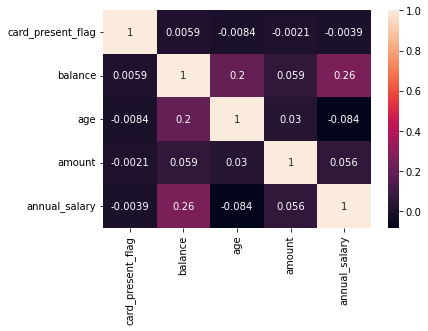

In [26]:
sns.heatmap(cor, annot=True) #it shows correlation between target variables 
plt.show()

# Predictive Analytics

Linear Regression:

In [32]:
N_train = int(len(df_customer)*0.8)
X_train = df_customer.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_customer["annual_salary"].iloc[:N_train]
X_test = df_customer.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_customer["annual_salary"].iloc[N_train:]

In [33]:
reg =  LinearRegression()

In [34]:
reg.fit(X_train,Y_train)

LinearRegression()

In [35]:
reg.score(X_train, Y_train) #regression score

0.23295376366257836

In [36]:
reg.predict(X_test) #Predicted values 

array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [37]:
reg.score(X_test, Y_test)

-0.3169423498074737

# Decision Tree - Classification and Regression

In [38]:
df_dec = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [39]:
pd.get_dummies(df_dec).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [41]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_dec).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_dec).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [43]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
decision_tree_class = DecisionTreeClassifier()

In [45]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train) #decision tree score

0.7882499481004774

In [46]:
decision_tree_class.predict(X_test) #Predicated Values 

array([1013, 1043, 4132, ..., 4054, 1043,  996], dtype=int64)

In [48]:
decision_tree_class.score(X_test, Y_test)


0.755085097550851

# Regression

In [49]:
decision_tree_reg = DecisionTreeRegressor()

In [50]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7468978726536879

In [53]:
decision_tree_reg.predict(X_test)

array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [54]:
decision_tree_reg.score(X_test,Y_test)

0.673099285463798